# Les modèles régularisés

Les modèles régularisés sont des modèles qui intègrent une pénalité sur la complexité du modèle pour éviter le sur-apprentissage. Ils sont souvent utilisés dans les contextes où le nombre de caractéristiques est supérieur au nombre d'observations, ou lorsque les caractéristiques sont fortement corrélées.

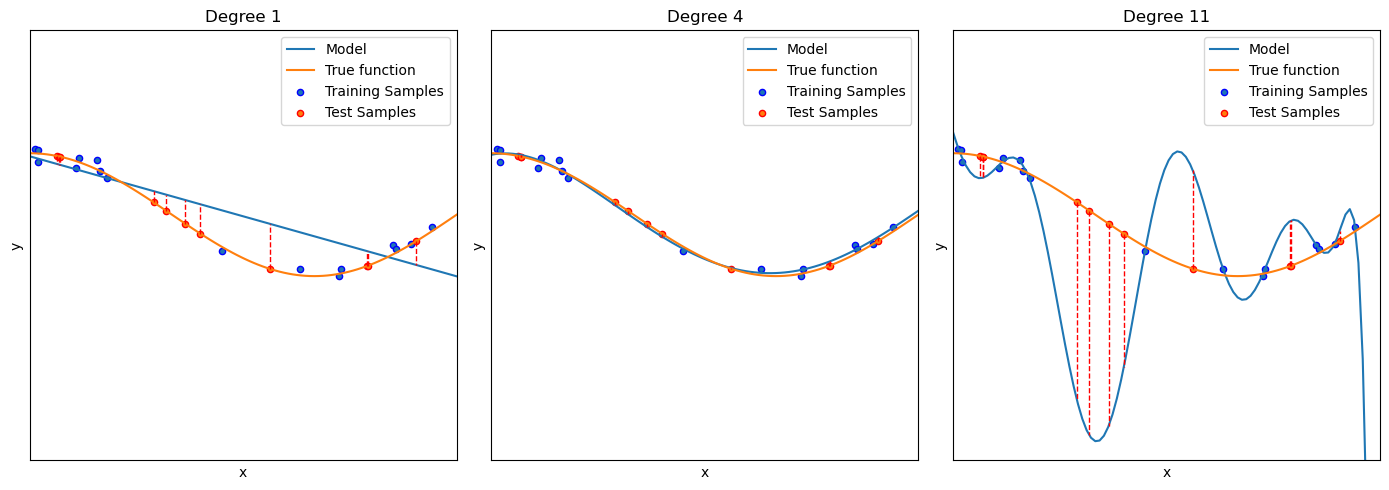

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(11)

n_samples = 20

X = np.sort(np.random.rand(n_samples))
X = X[(X < 0.2) | (X > 0.5)]

# Add the point at x = 0.38
X = np.concatenate([X, [0.45]])

n_samples = len(X)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

degrees = [1, 4, 11]

# Générer des points de test
n_test_samples = 10
X_test = np.sort(np.random.rand(n_test_samples))
X_test = np.concatenate([X_test, [0.4]])
y_test = true_fun(X_test)

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_plot = np.linspace(0, 1, 100)
    plt.plot(X_plot, pipeline.predict(X_plot[:, np.newaxis]), label="Model")
    plt.plot(X_plot, true_fun(X_plot), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Training Samples")
    plt.scatter(X_test, y_test, edgecolor="r", s=20, label="Test Samples")

    # Ajouter les lignes verticales pour représenter les erreurs sur les points de test
    y_test_pred = pipeline.predict(X_test[:, np.newaxis])
    for x_test, y_test_true, y_test_pred in zip(X_test, y_test, y_test_pred):
        plt.plot([x_test, x_test], [y_test_true, y_test_pred], 'r--', linewidth=1)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-4, 3))
    plt.legend(loc="best")
    plt.title(
        "Degree {}".format(
            degrees[i]
        )
    )
plt.tight_layout()
plt.show()


Dans le graphique ci-dessus, nous avons les 3 situations suivantes :
- **Underfit** : le modèle est trop simple pour capturer la structure des données. Il n'est pas capable de s'adapter aux variations des données d'entraînement et a donc un mauvais score sur les données d'entraînement et de test.
- **Good fit** : le modèle est suffisamment complexe pour capturer la structure des données sans sur-apprendre. Il a un bon score sur les données d'entraînement et de test.
- **Overfit** : le modèle est trop complexe et s'adapte trop aux données d'entraînement, capturant même le bruit. Il a un bon score sur les données d'entraînement mais un mauvais score sur les données de test.

# Ridge

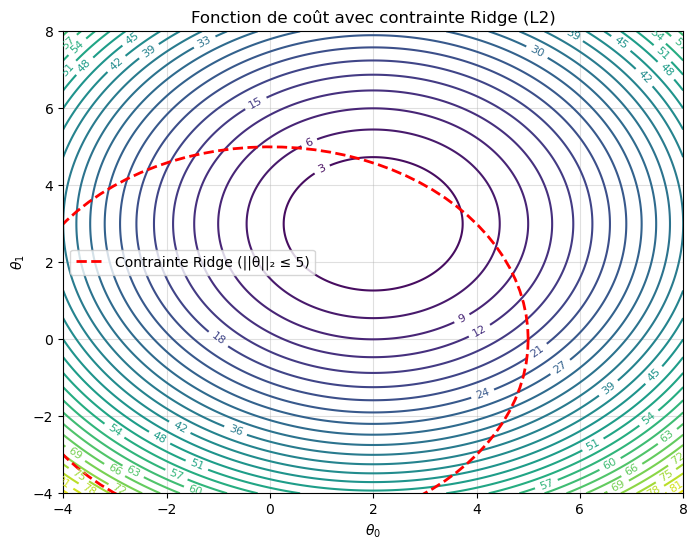

In [8]:
# Grille de paramètres
theta0 = np.linspace(-4, 8, 400)
theta1 = np.linspace(-4, 8, 400)
T0, T1 = np.meshgrid(theta0, theta1)

# Fonction de coût (exemple simple)
cost = (T0 - 2)**2 + (T1 - 3)**2

# Seuil pour la contrainte
c = 5

# Tracé de la contrainte Ridge (cercle) : ||theta||_2 <= c
angles = np.linspace(0, 2 * np.pi, 100)
circle_theta0 = c * np.cos(angles)
circle_theta1 = c * np.sin(angles)

plt.figure(figsize=(8, 6))
contours = plt.contour(T0, T1, cost, levels=30, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(circle_theta0, circle_theta1, 'r--', linewidth=2, label=f'Contrainte Ridge (||θ||₂ ≤ {c})')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Fonction de coût avec contrainte Ridge (L2)')
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

# Lasso

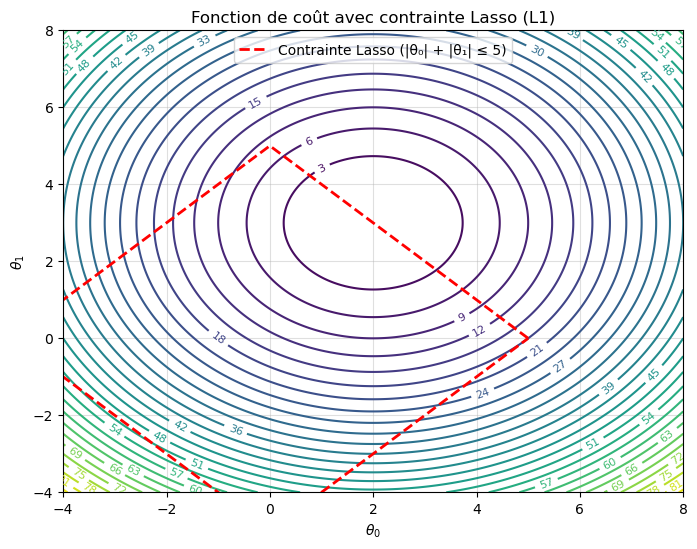

In [9]:
# Grille de paramètres
theta0 = np.linspace(-4, 8, 400)
theta1 = np.linspace(-4, 8, 400)
T0, T1 = np.meshgrid(theta0, theta1)

# Fonction de coût (exemple simple)
cost = (T0 - 2)**2 + (T1 - 3)**2

# Seuil pour la contrainte
c = 5

# Tracé de la contrainte Lasso (losange) : |theta0| + |theta1| <= c
# Les sommets du losange sont aux points (±c, 0) et (0, ±c).
losange_theta0 = np.array([c, 0, -c, 0, c])
losange_theta1 = np.array([0, c, 0, -c, 0])

plt.figure(figsize=(8, 6))
contours = plt.contour(T0, T1, cost, levels=30, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(losange_theta0, losange_theta1, 'r--', linewidth=2, label=f'Contrainte Lasso (|θ₀| + |θ₁| ≤ {c})')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Fonction de coût avec contrainte Lasso (L1)')
plt.legend()
plt.grid(alpha=0.4)
plt.xlim(-4, 8)
plt.ylim(-4, 8)
plt.show()

# Elastic Net

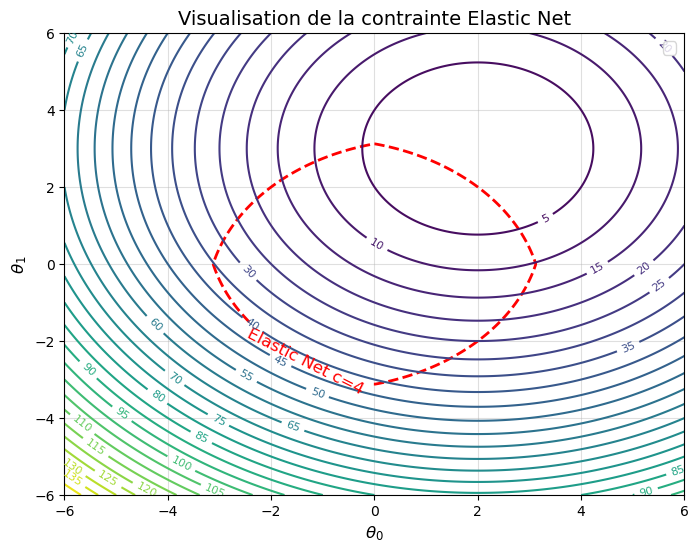

In [7]:
# Paramètres pour la grille
theta0 = np.linspace(-6, 6, 400)
theta1 = np.linspace(-6, 6, 400)
T0, T1 = np.meshgrid(theta0, theta1)

# Paramètre Elastic Net
alpha = 0.5  # Poids de la pénalisation L1 (alpha=1 => Lasso, alpha=0 => Ridge)
c = 4        # Seuil de la contrainte

# Définition de la pénalité Elastic Net:
# On peut écrire la pénalité Elastic Net comme 
#   E(theta0, theta1) = alpha*(|theta0|+|theta1|) + (1-alpha)/2*(theta0**2+theta1**2)
penalty = alpha*(np.abs(T0) + np.abs(T1)) + (1 - alpha)/2*(T0**2 + T1**2)

# Visualisation du contour où la pénalité vaut c
plt.figure(figsize=(8, 6))
# On trace d'abord le contour de la pénalité Elastic Net = c
elastic_contour = plt.contour(T0, T1, penalty, levels=[c], colors='r', linestyles='--', linewidths=2)
plt.clabel(elastic_contour, fmt={c: f'Elastic Net c={c}'}, fontsize=12)

# Optionnel : on peut ajouter les contours d'une fonction de coût (par exemple, une fonction quadratique)
cost = (T0 - 2)**2 + (T1 - 3)**2
contours = plt.contour(T0, T1, cost, levels=30, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

plt.xlabel(r'$\theta_0$', fontsize=12)
plt.ylabel(r'$\theta_1$', fontsize=12)
plt.title('Visualisation de la contrainte Elastic Net', fontsize=14)
plt.grid(alpha=0.4)
plt.legend([f'Elastic Net : α={alpha}, c={c}'], loc='upper right', fontsize=12)
plt.show()